In [20]:

import os

source_dir = '/Users/al/Desktop/results/dino2_20_resnet_selected'

os.chdir(source_dir)

print(os.getcwd())

/Users/al/Desktop/results/dino2_20_resnet_selected


In [21]:
from os import listdir
from os.path import isfile, join

filenames = [f for f in listdir(source_dir) if isfile(join(source_dir, f))]

print( onlyfiles )

['simplex.csv', 'mean_point.csv', 'msed.xlsx', 'perfect_point.csv', 'msed.csv', 'average.csv']


In [29]:
import pandas as pd

data = dict()

for f in filenames:
    key = f.split('.')[0]
    print( f"Reading file {f} into data as {key}" )
    data[key] = pd.read_csv(f)


Reading file simplex.csv into data as simplex
Reading file mean_point.csv into data as mean_point
Reading file sed.csv into data as sed
Reading file perfect_point.csv into data as perfect_point
Reading file cos.csv into data as cos
Reading file msed.csv into data as msed
Reading file average.csv into data as average


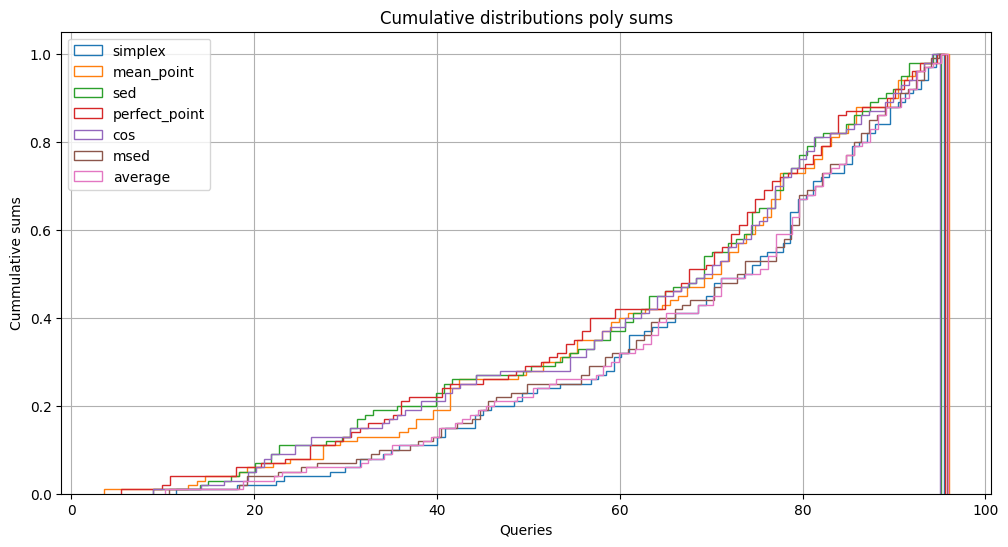

In [49]:
# This plots the cummulative distributions of poly sums

# Set up the plotting infrastructure

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

for key in data:    
    column = data[key]["best_poly_sums"]
    n_bins = column.size
    # plot the cumulative histogram
    n, bins, patches = ax.hist(column, n_bins, density=True, histtype='step', cumulative=True, label=key)

# tidy up the figure
ax.grid(True)
ax.legend(loc='upper left')
ax.set_title('Cumulative distributions poly sums')
ax.set_xlabel('Queries')
ax.set_ylabel('Sums')

plt.show()

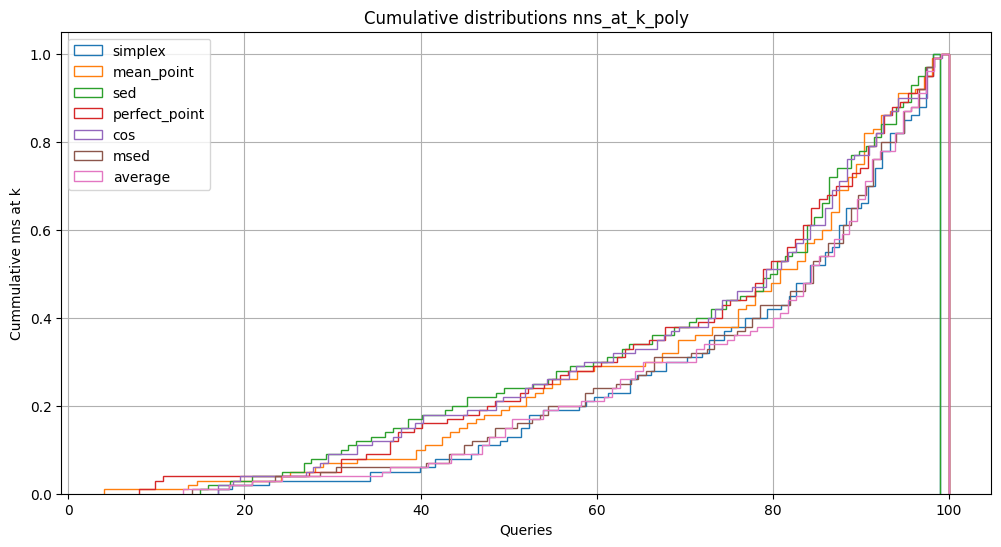

In [56]:
# This plots the cummulative distributions of nns_at_k_poly

# Set up the plotting infrastructure

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

for key in data:    
    column = data[key]["nns_at_k_poly"]
    n_bins = column.size
    # plot the cumulative histogram

    cdf = np.cumsum(column)

    n, bins, patches = ax.hist(column, n_bins, density=True, histtype='step', cumulative=True, label=key)


# tidy up the figure
ax.grid(True)
ax.legend(loc='upper left')
ax.set_title('Cumulative distributions nns_at_k_poly')
ax.set_xlabel('Queries')
ax.set_ylabel('Cummulative nns at k')

plt.show()